# P4: Implementation of TF-IDF, NER and N-gram
1. TF-IDF Vectorization
2. Named Entity Recognition (NER)
3. N-Gram Generation
4. Wordcloud & Clustering

In [14]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import spacy
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter

In [15]:

file_paths = [
    '/Users/sumith/Desktop/sem4/ADA/LAB/LAB4/Climate Change and Sustainability.txt',
    '/Users/sumith/Desktop/sem4/ADA/LAB/LAB4/Global Health and Pandemics.txt',
    '/Users/sumith/Desktop/sem4/ADA/LAB/LAB4/Technology and Innovation.txt'
 ]
documents = []
for path in file_paths:
    with open(path, 'r') as file:
        documents.append(file.read())

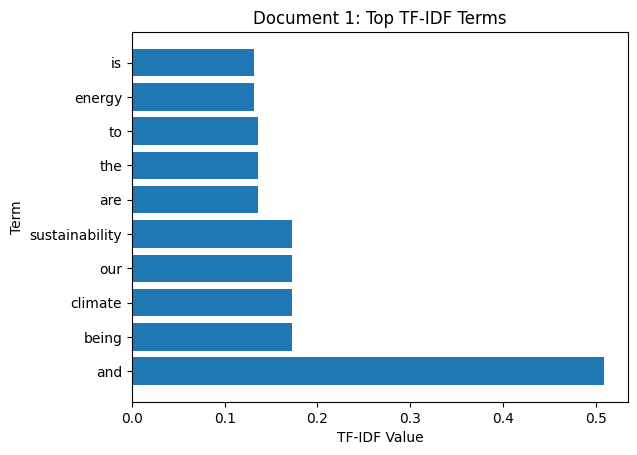

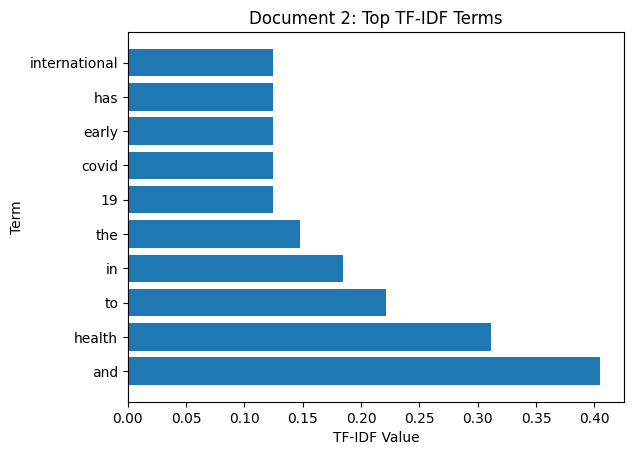

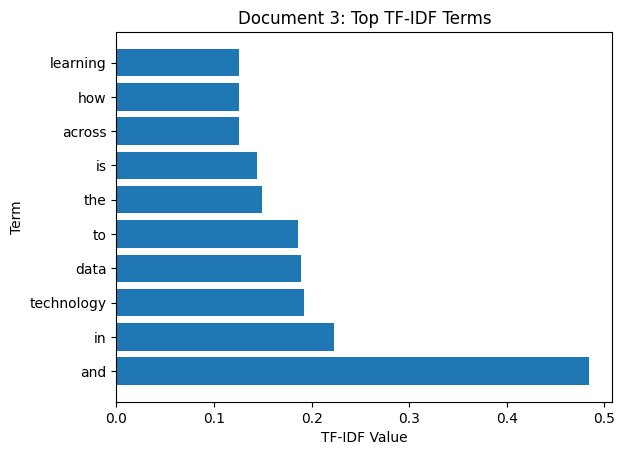

In [16]:
# Task 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()
top_terms = []
for doc_idx, doc in enumerate(tfidf_matrix):
    scores = zip(feature_names, doc.toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[:10]
    top_terms.append(sorted_scores)
   
    terms, values = zip(*sorted_scores)
    plt.barh(terms, values)
    plt.title(f'Document {doc_idx + 1}: Top TF-IDF Terms')
    plt.xlabel('TF-IDF Value')
    plt.ylabel('Term')
    plt.show()

## Interpretation of TF-IDF Results

**Key Insights:**
- Higher TF-IDF scores = terms frequent in this document but rare across all documents
- Top terms reveal document-specific themes and characteristic vocabulary
- Technical terms and proper nouns typically score higher than common words
- These scores help distinguish each document's unique content focus

In [17]:
# Task 2: Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')
entity_counts = {}
for doc_idx, text in enumerate(documents):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    entity_counts[doc_idx + 1] = Counter([ent[1] for ent in entities])
    print(f'Document {doc_idx + 1}: Named Entities')
    print(entities)
    print(f'Entity Frequency Count: {entity_counts[doc_idx + 1]}')

Document 1: Named Entities
[('one', 'CARDINAL'), ('Earth', 'LOC'), ('the United Nations', 'ORG'), ('IPCC', 'ORG'), ('Denmark', 'GPE'), ('Germany', 'GPE'), ('India', 'GPE'), ('Greta Thunberg', 'PERSON'), ('ESG', 'ORG'), ('Governance', 'PERSON'), ('AI', 'GPE')]
Entity Frequency Count: Counter({'GPE': 4, 'ORG': 3, 'PERSON': 2, 'CARDINAL': 1, 'LOC': 1})
Document 2: Named Entities
[('recent years', 'DATE'), ('COVID-19', 'ORG'), ('WHO', 'ORG'), ('CDC', 'ORG'), ('Pfizer', 'PERSON'), ('Moderna', 'PERSON'), ('Beyond COVID-19', 'PERSON'), ('millions', 'CARDINAL'), ('the Bill & Melinda Gates Foundation', 'ORG'), ('Mental', 'NORP'), ('AI', 'ORG'), ('AI', 'GPE')]
Entity Frequency Count: Counter({'ORG': 5, 'PERSON': 3, 'DATE': 1, 'CARDINAL': 1, 'NORP': 1, 'GPE': 1})
Document 3: Named Entities
[('recent years', 'DATE'), ('Google', 'ORG'), ('Microsoft', 'ORG'), ('Amazon', 'ORG'), ('Coursera', 'PERSON'), ('IoT', 'ORG'), ('AI', 'GPE')]
Entity Frequency Count: Counter({'ORG': 4, 'DATE': 1, 'PERSON': 1, '



**Key Entity Types:**
- **PERSON**: People, characters | **ORG**: Organizations, companies
- **GPE**: Countries, cities | **DATE**: Time periods | **MONEY/PERCENT**: Values

**Insights:**
- Entity distribution reveals document themes (ORG = business focus, GPE = geographical content)
- Higher entity counts indicate information-rich, fact-dense documents
- Entity patterns help classify document domains and extract structured knowledge

In [18]:
# Task 3: N-Gram Generation
for doc_idx, text in enumerate(documents):
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)
    print(f'Document {doc_idx + 1}: Top 5 Bigrams')
    print(bigram_counts.most_common(5))
    print(f'Document {doc_idx + 1}: Top 5 Trigrams')
    print(trigram_counts.most_common(5))

Document 1: Top 5 Bigrams
[(('are', 'being'), 2), (('\ufeffClimate', 'change'), 1), (('change', 'remains'), 1), (('remains', 'one'), 1), (('one', 'of'), 1)]
Document 1: Top 5 Trigrams
[(('\ufeffClimate', 'change', 'remains'), 1), (('change', 'remains', 'one'), 1), (('remains', 'one', 'of'), 1), (('one', 'of', 'the'), 1), (('of', 'the', 'biggest'), 1)]
Document 2: Top 5 Bigrams
[(('vaccines', 'in'), 2), (('such', 'as'), 2), (('and', 'AI'), 2), (('\ufeffGlobal', 'health'), 1), (('health', 'systems'), 1)]
Document 2: Top 5 Trigrams
[(('\ufeffGlobal', 'health', 'systems'), 1), (('health', 'systems', 'have'), 1), (('systems', 'have', 'faced'), 1), (('have', 'faced', 'significant'), 1), (('faced', 'significant', 'strain'), 1)]
Document 3: Top 5 Bigrams
[(('\ufeffTechnology', 'continues'), 1), (('continues', 'to'), 1), (('to', 'redefine'), 1), (('redefine', 'how'), 1), (('how', 'we'), 1)]
Document 3: Top 5 Trigrams
[(('\ufeffTechnology', 'continues', 'to'), 1), (('continues', 'to', 'redefine'


**Understanding N-Grams:**
- **Bigrams**: Word pairs revealing common phrases and collocations
- **Trigrams**: Three-word sequences capturing complex concepts

**Key Insights:**
- Frequent n-grams show domain-specific terminology and writing patterns
- Bigrams reveal relationships between concepts
- Trigrams capture complete phrases and technical terms
- Compare across documents to identify unique language characteristics

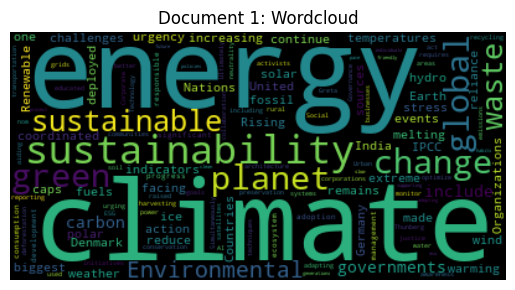

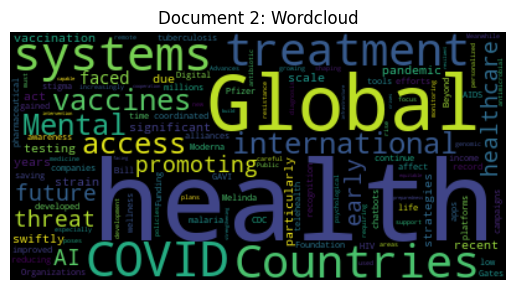

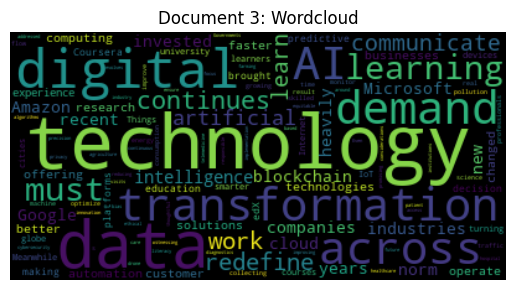

Cluster Labels: [1 0 1]

Document-Cluster Assignment:
Document 1: Cluster 1
Document 2: Cluster 0
Document 3: Cluster 1

Top 5 terms for each cluster:
Cluster 0: ['and', 'health', 'to', 'in', 'the']
Cluster 1: ['and', 'to', 'the', 'is', 'in']


In [19]:
# Task 4: Wordcloud & Clustering
# Wordcloud Visualization
for doc_idx, text in enumerate(documents):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Document {doc_idx + 1}: Wordcloud')
    plt.axis('off')
    plt.show()

# Clustering using KMeans (3 clusters for 3 documents)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_

print('Cluster Labels:', cluster_labels)
print('\nDocument-Cluster Assignment:')
for doc_idx, cluster in enumerate(cluster_labels):
    print(f'Document {doc_idx + 1}: Cluster {cluster}')
    
# Display cluster centers (top terms for each cluster)
feature_names = tfidf_vectorizer.get_feature_names_out()
print('\nTop 5 terms for each cluster:')
for cluster_idx, center in enumerate(kmeans.cluster_centers_):
    top_indices = center.argsort()[-5:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    print(f'Cluster {cluster_idx}: {top_terms}')



**Wordcloud Analysis:**
- Larger words = higher frequency in document
- Provides quick visual overview of main themes and topics

**Clustering Analysis (3 Clusters):**
- Each document can be assigned to its own cluster based on unique vocabulary
- Cluster centers show the most characteristic terms for each group
- Documents with same cluster number share similar vocabulary/themes
- Top terms for each cluster reveal the distinguishing features that separate documents
- Compare cluster assignments with actual document content to validate groupings